# How the FFT (Fast Fourier Tranform) works in Python and how to use it. A practical guide.

## Motivation
I wrote this in order to have a future reference in how to FFT works in Python. Basically everytime that I try to do some frequency related analysis I have to rethink all the quantities. Therefore I decided to write here a basic implementation with all the details.

## Implementation Number 1 
Here we juts show how to go from a signal composed from a handful of frequencies to the FFT that revelas those frequencies in the proper units.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sampling_rate = 20 # This quantity is on Hertz
step = 1.0 / sampling_rate
Tmax = 20.0
time = np.arange(0, Tmax, step)
N_to_use = 1024  # Should be a power of two.

### Size of the FFT
The FFT is going to be of the size N_to_use. Having multiples of 2 here allows us to do the calculation faster. Otherwise **zero padding** is used.

In [18]:
print("The smalles frequency that the FFT will discern: ", sampling_rate / N_to_use)
print("Nyquist Frequency: ", sampling_rate / 2)

The smalles frequency that the FFT will discern:  0.01953125
Nyquist Frequency:  10.0


### Analysis of the sampling rate on the limits of what the FFT can tell us.
** The Smallest Possible Frequency ** 

The smallest or slower frequency (or the period of the signal) is proportional to the samplin rate and inversely proportional number of points that we use. This make sense because the higher is the sampling rate then the higher the quantity of points that we will require to fill one period and therefore get information about the signal. On the other hand the bigger the number of points the easier to cover one period of the signal and therefore we can get information for smaller frequencies.

** The Nyquist Frequency or the Biggest Possible Frequency** 

This is more straighforward. The bigger the sampling frequency the higher the range of frequencies that we can get information from.

In [22]:
f1 = 1.0 
f2 = 2.0 
f3 = 4.0  # All of this on Hertz
y1 = np.sin(2 * np.pi * f1 * time)
y2 = np.sin(2 * np.pi * f2 * time)
y3 = np.sin(2 * np.pi * f3 * time)
y = y1 + y2 + y3
transform = np.fft.fft(y, N_to_use)

# We get the proper frequencies for the FFT
frequencies = np.fft.fftfreq(N_to_use, d=step)

### A word about frequencies units and the pi value
When we multiply the frequency and time by the  $ 2\pi $ in the argument of trigonometric function we are actually asking that the natural period of the sine is equal to one. Otherwise we will require $ 2 \pi $ units to go from one period to the other. 

In other words we are doing this so we can talk about the frequency in ordinary terms (1 / s) instead of angular units.

See angular frequency vs cycles per second in order to further understand this point.

(-6, 6)

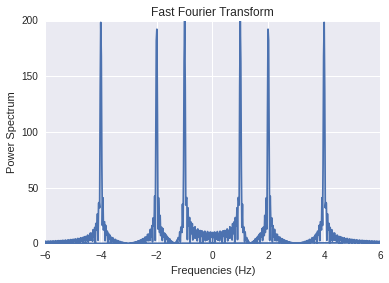

In [26]:
%matplotlib inline
plt.plot(frequencies, np.abs(transform))
plt.title('Fast Fourier Transform')
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Power Spectrum')
plt.xlim([-6, 6])

### Final Comments
So we see that the FFT gives back the frequencies at the proper values that we know because we defined them to be that way. Finally, usually one ignores the negatives frequencies and only takes the positive values in this kind of analysis. This can be achieved by cutting the freq and the transform apporpiately. The frequencies start at 0 till the middle of the vector and then show the negative frequencies, so we get only the first half of the frequencies and of the transform vector consequently.


(0, 6)

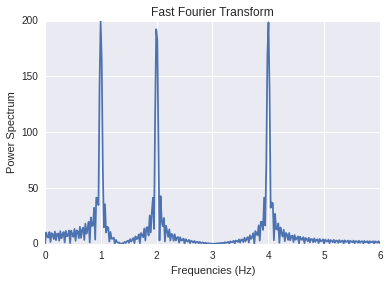

In [37]:
aux = int(N_to_use / 2)
freq_aux = frequencies[0: aux]
plt.plot(freq_aux, np.abs(transform[:aux]))
plt.title('Fast Fourier Transform')
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Power Spectrum')
plt.xlim([0, 6])

## Implementation Number 2 
Here I show how we can calculate the inverse fourier transform, then the inverse that get us back to the original signal and how the sampling rate and the number of points that we use to calculate the FFT affects the units of the inverse.

In [71]:
sampling_rate = 100 # This quantity is on Hertz
step = 1.0 / sampling_rate
Tmax = 20.0
time = np.arange(0, Tmax, step)
N_to_use = 1024 * 2  # Should be a power of two.

Here we will give the frequency in terms of the period for ease of interpretation.

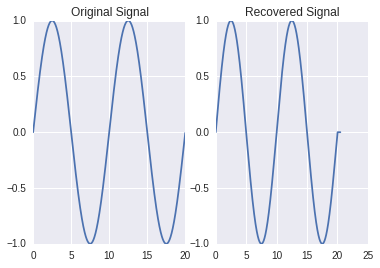

In [72]:
T = 10.0  # Period
f = 1.0 / T  # Frequency relationship
y = np.sin(2 * np.pi * f * time)
transform = np.fft.fft(y, N_to_use)
inverse = np.fft.ifft(transform, N_to_use)
time_inverse = np.arange(0, N_to_use * step, step)

# Now we plot this.

plt.subplot(1, 2, 1)
plt.title('Original Signal')
plt.plot(time, y)

plt.subplot(1, 2, 2)
plt.title('Recovered Signal')
plt.plot(time_inverse, inverse.real)

### About the Period of the Recovered Signal
The recovered signal is going to repeat itself after sampling_rate * Period which in this case is:

In [62]:
sampling_rate * T

500.0

Things to answer:
* Proper units, why?
* How the N_to_use, sampling rate and Tmax affect the extraction.